## Innov8 Capstone Project
### Emotion Detection using Facial Expressions

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
# tensor flow version
import tensorflow as tf
from tensorflow import keras

# check tf version
print(tf.__version__)

2.10.0


In [3]:
# Load the datasets test and train which are images in folders test and train in which each emotion is a folder
# The images are in the format of 48x48 pixels

In [4]:
import os

def count_images_in_folders(base_path):
    emotion_counts = {}
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            emotion_counts[folder] = len(os.listdir(folder_path))
    return emotion_counts

train_path = 'train'
test_path = 'test'

train_counts = count_images_in_folders(train_path)
test_counts = count_images_in_folders(test_path)

print("Train counts:", train_counts)
print("Test counts:", test_counts)

Train counts: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Test counts: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


In [5]:
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())
total_all = total_train + total_test

print("Total in train:", total_train)
print("Total in test:", total_test)
print("Total in all:", total_all)

Total in train: 28709
Total in test: 7178
Total in all: 35887


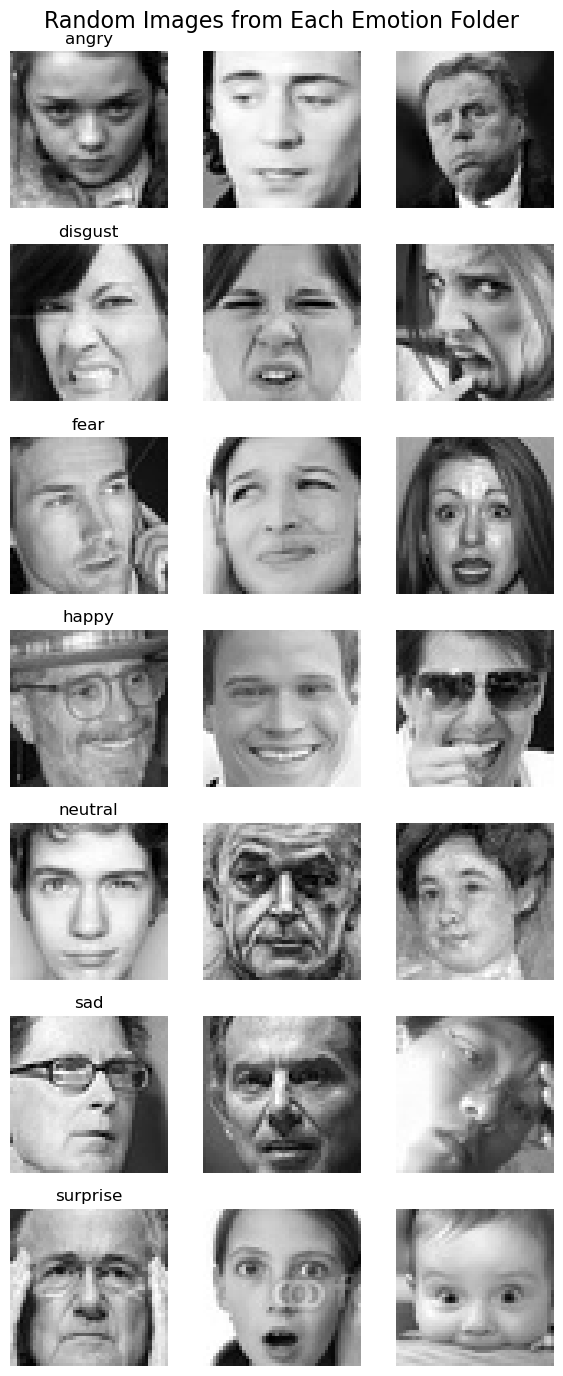

In [6]:
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(base_path, emotion_counts, num_images=1):
    fig, axes = plt.subplots(len(emotion_counts), num_images, figsize=(num_images * 2, len(emotion_counts) * 2))
    fig.suptitle('Random Images from Each Emotion Folder', fontsize=16)
    
    for i, (emotion, count) in enumerate(emotion_counts.items()):
        folder_path = os.path.join(base_path, emotion)
        image_files = os.listdir(folder_path)
        random_images = random.sample(image_files, num_images)
        
        for j, image_file in enumerate(random_images):
            image_path = os.path.join(folder_path, image_file)
            img = mpimg.imread(image_path)
            ax = axes[i, j] if num_images > 1 else axes[i]
            ax.imshow(img, cmap='gray')
            ax.axis('off')
            if j == 0:
                ax.set_title(emotion)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

display_random_images(train_path, train_counts, num_images=3)

In [7]:
import matplotlib.image as mpimg

# Get the path of one image from the train dataset
sample_image_path = os.path.join(train_path, list(train_counts.keys())[0], os.listdir(os.path.join(train_path, list(train_counts.keys())[0]))[0])

# Read the image
sample_image = mpimg.imread(sample_image_path)

# Print the shape of the image
print("Image size:", sample_image.shape)
# Go through all the images in the folder and check their sizes
image_sizes = {}
for emotion, count in train_counts.items():
    folder_path = os.path.join(train_path, emotion)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        if img.shape not in image_sizes:
            image_sizes[img.shape] = 0
        image_sizes[img.shape] += 1

print("Image sizes and their counts:", image_sizes)

Image size: (48, 48)
Image sizes and their counts: {(48, 48): 28709}


In [8]:
def is_colored(image):
    return len(image.shape) == 3 and image.shape[2] == 3

# Check the color of the sample image
if is_colored(sample_image):
    print("The sample image is colored.")
else:
    print("The sample image is grayscale.")

# Check the color of all images in the dataset
color_counts = {'colored': 0, 'grayscale': 0}
for emotion, count in train_counts.items():
    folder_path = os.path.join(train_path, emotion)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        if is_colored(img):
            color_counts['colored'] += 1
        else:
            color_counts['grayscale'] += 1

print("Color counts in the dataset:", color_counts)

The sample image is grayscale.
Color counts in the dataset: {'colored': 0, 'grayscale': 28709}


c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

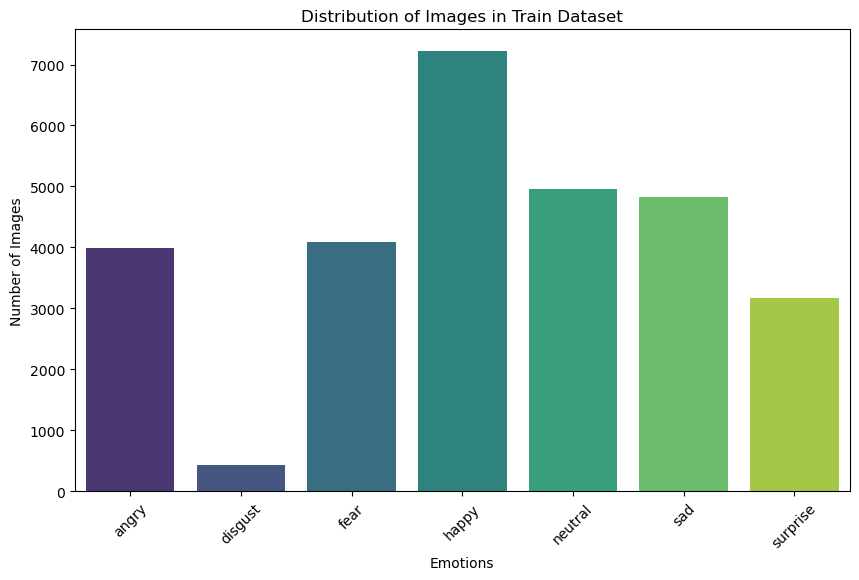

c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

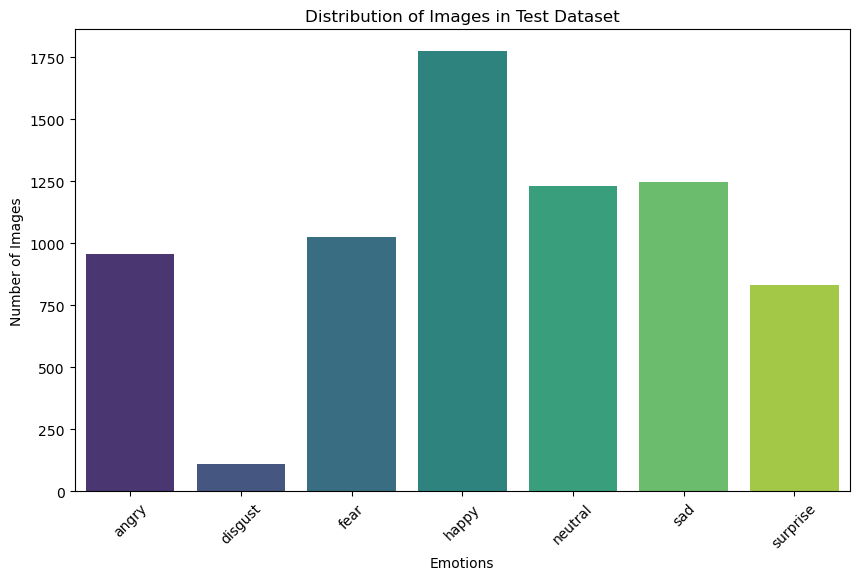

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of images across different emotions in the train and test datasets
def plot_emotion_distribution(counts, title):
    emotions = list(counts.keys())
    num_images = list(counts.values())
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=emotions, y=num_images, palette='viridis')
    plt.title(title)
    plt.xlabel('Emotions')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_emotion_distribution(train_counts, 'Distribution of Images in Train Dataset')
plot_emotion_distribution(test_counts, 'Distribution of Images in Test Dataset')

c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

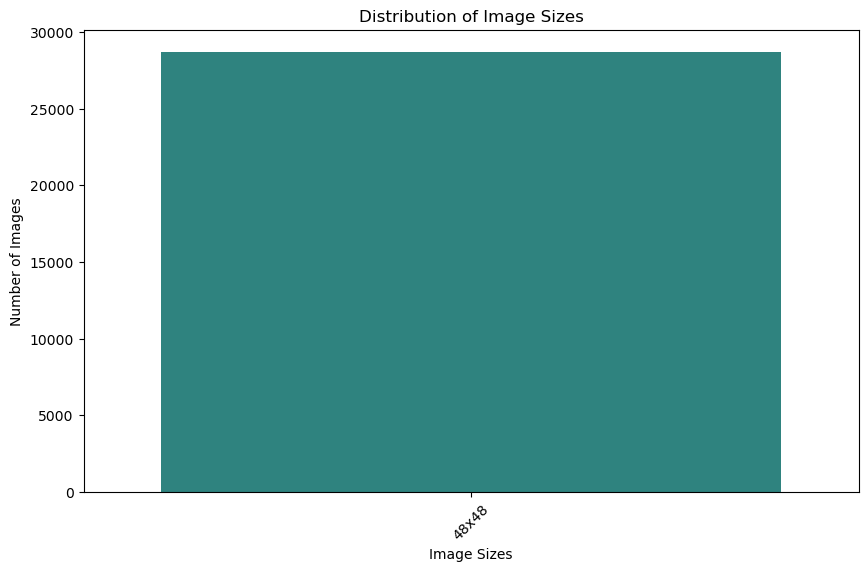

In [10]:
# Plot the distribution of image sizes
def plot_image_size_distribution(image_sizes):
    sizes = [f'{size[0]}x{size[1]}' for size in image_sizes.keys()]
    counts = list(image_sizes.values())
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sizes, y=counts, palette='viridis')
    plt.title('Distribution of Image Sizes')
    plt.xlabel('Image Sizes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_image_size_distribution(image_sizes)

c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\abhin\anaconda3\envs\DevelopmentEnv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

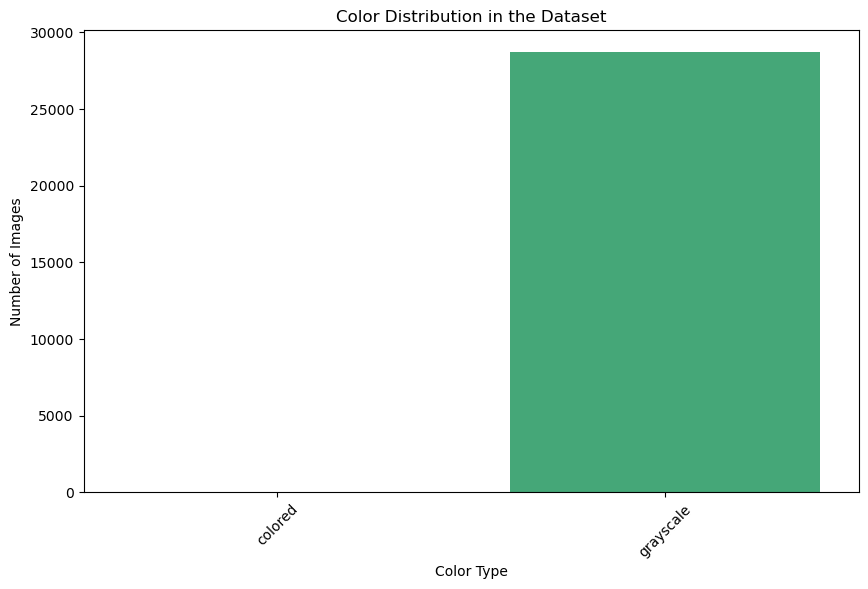

In [11]:
# Plot the color distribution
def plot_color_distribution(color_counts):
    colors = list(color_counts.keys())
    counts = list(color_counts.values())
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=colors, y=counts, palette='viridis')
    plt.title('Color Distribution in the Dataset')
    plt.xlabel('Color Type')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_color_distribution(color_counts)

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import numpy as np

def preprocess_image(image_path, target_size=(48, 48)):
    # Load the image
    image = load_img(image_path, color_mode='grayscale', target_size=target_size)
    # Convert the image to array
    image = img_to_array(image)
    # Normalize the pixel values
    image = image / 255.0
    return image

def preprocess_dataset(base_path, emotion_counts, target_size=(48, 48)):
    images = []
    labels = []
    for emotion, count in emotion_counts.items():
        folder_path = os.path.join(base_path, emotion)
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image = preprocess_image(image_path, target_size)
            images.append(image)
            labels.append(emotion)
    return np.array(images), np.array(labels)

# Preprocess the train and test datasets
train_images, train_labels = preprocess_dataset(train_path, train_counts)
test_images, test_labels = preprocess_dataset(test_path, test_counts)

# Convert labels to categorical
emotion_list = list(train_counts.keys())
train_labels = to_categorical([emotion_list.index(label) for label in train_labels], num_classes=len(emotion_list))
test_labels = to_categorical([emotion_list.index(label) for label in test_labels], num_classes=len(emotion_list))

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (28709, 48, 48, 1)
Train labels shape: (28709, 7)
Test images shape: (7178, 48, 48, 1)
Test labels shape: (7178, 7)


In [13]:
from sklearn.model_selection import train_test_split

# Split the train data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Training images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)

# Ensure the data is in the correct format for the CNN model
train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
val_images = val_images.reshape(val_images.shape[0], 48, 48, 1)
test_images = test_images.reshape(test_images.shape[0], 48, 48, 1)

print("Reshaped training images shape:", train_images.shape)
print("Reshaped validation images shape:", val_images.shape)
print("Reshaped test images shape:", test_images.shape)

Training images shape: (22967, 48, 48, 1)
Validation images shape: (5742, 48, 48, 1)
Training labels shape: (22967, 7)
Validation labels shape: (5742, 7)
Reshaped training images shape: (22967, 48, 48, 1)
Reshaped validation images shape: (5742, 48, 48, 1)
Reshaped test images shape: (7178, 48, 48, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential() 

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(emotion_list), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model.save('emotion_detection_model.h5')

In [10]:
!pip install distutils

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\abhin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for distutils


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [15]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_data_generators(train_dir, test_dir, img_size=(48, 48), batch_size=32):
    # Augmentation options for training data
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Only rescale for test data
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    # Create the data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
    )

    validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical'
    )

    return train_generator, validation_generator


In [25]:
# Load VGG16 base model with ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune by unfreezing the last few layers of VGG16
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Add custom classification layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(emotion_list), activation='softmax')(x)

# Complete VGG16-based model
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate for fine-tuning
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # Only rescale validation data


In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [26]:
# make train_images 3 channel rgb greyscale
train_images_rgb = np.repeat(train_images, 3, -1)
val_images_rgb = np.repeat(val_images, 3, -1)
test_images_rgb = np.repeat(test_images, 3, -1)

In [28]:
history = vgg16_model.fit(
    train_datagen.flow(train_images_rgb, train_labels, batch_size=64),  
    epochs=50,
    validation_data=val_datagen.flow(val_images_rgb, val_labels),
    # callbacks=[early_stopping, reduce_lr]
)

# Evaluate on test data
test_loss, test_accuracy = vgg16_model.evaluate(test_images_rgb, test_labels)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/50
359/359 [==============================] - 69s 193ms/step - loss: 1.6414 - accuracy: 0.3533 - val_loss: 1.4711 - val_accuracy: 0.4444
Epoch 2/50
359/359 [==============================] - 71s 199ms/step - loss: 1.5610 - accuracy: 0.3943 - val_loss: 1.4621 - val_accuracy: 0.4345
Epoch 3/50
359/359 [==============================] - 75s 209ms/step - loss: 1.5071 - accuracy: 0.4171 - val_loss: 1.3679 - val_accuracy: 0.4788
Epoch 4/50
359/359 [==============================] - 82s 228ms/step - loss: 1.4708 - accuracy: 0.4340 - val_loss: 1.3721 - val_accuracy: 0.4781
Epoch 5/50
359/359 [==============================] - 67s 188ms/step - loss: 1.4420 - accuracy: 0.4503 - val_loss: 1.3364 - val_accuracy: 0.4836
Epoch 6/50
359/359 [==============================] - 68s 190ms/step - loss: 1.4175 - accuracy: 0.4595 - val_loss: 1.3305 - val_accuracy: 0.4876
Epoch 7/50
359/359 [==============================] - 67s 187ms/step - loss: 1.3923 - accuracy: 0.4663 - val_loss: 1.3202 - val_ac

In [29]:
vgg16_model.save('emotion_detection_vgg16_model.h5')

In [36]:
mobilenet_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                    

In [35]:
vgg16_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [30]:
from tensorflow.keras.applications import MobileNet

# Load MobileNet model with ImageNet weights, excluding the top layers
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Fine-tune by unfreezing the last few layers of MobileNet
for layer in base_model_mobilenet.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Add custom classification layers on top of MobileNet
x = base_model_mobilenet.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
mobilenet_predictions = Dense(len(emotion_list), activation='softmax')(x)

# Complete MobileNet-based model
mobilenet_model = Model(inputs=base_model_mobilenet.input, outputs=mobilenet_predictions)

# Compile the MobileNet model
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


17225924/17225924 [==============================] - 2s 0us/step


In [32]:
# Train the MobileNet model with the same callbacks and data generators
mobilenet_history = mobilenet_model.fit(
    train_datagen.flow(train_images_rgb, train_labels, batch_size=64),  
    epochs=20,
    validation_data=val_datagen.flow(val_images_rgb, val_labels),
    # callbacks=[early_stopping, reduce_lr]
)

# Evaluate MobileNet model on test data
test_loss_mobilenet, test_accuracy_mobilenet = mobilenet_model.evaluate(test_images_rgb, test_labels)
print(f'Test accuracy with MobileNet: {test_accuracy_mobilenet}')


Epoch 1/20
359/359 [==============================] - 62s 172ms/step - loss: 2.3062 - accuracy: 0.2641 - val_loss: 1.9334 - val_accuracy: 0.3382
Epoch 2/20
359/359 [==============================] - 50s 140ms/step - loss: 1.8605 - accuracy: 0.3041 - val_loss: 1.6535 - val_accuracy: 0.3568
Epoch 3/20
359/359 [==============================] - 51s 143ms/step - loss: 1.7223 - accuracy: 0.3287 - val_loss: 1.6741 - val_accuracy: 0.3607
Epoch 4/20
359/359 [==============================] - 48s 133ms/step - loss: 1.6796 - accuracy: 0.3417 - val_loss: 1.6112 - val_accuracy: 0.3649
Epoch 5/20
359/359 [==============================] - 51s 142ms/step - loss: 1.6503 - accuracy: 0.3497 - val_loss: 1.5798 - val_accuracy: 0.3828
Epoch 6/20
359/359 [==============================] - 47s 130ms/step - loss: 1.6289 - accuracy: 0.3575 - val_loss: 1.5444 - val_accuracy: 0.4046
Epoch 7/20
359/359 [==============================] - 48s 134ms/step - loss: 1.6187 - accuracy: 0.3654 - val_loss: 1.5840 - val_ac

In [33]:
mobilenet_model.save('emotion_detection_mobilenet_model.h5')

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def preprocess_image(image_path, target_size=(48, 48)):
    # Load the image
    image = load_img(image_path, color_mode='grayscale', target_size=target_size)
    # Convert the image to array
    image = img_to_array(image)
    # Normalize the pixel values
    image = image / 255.0
    # Reshape the image to add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

def predict_emotion(image_path, model, emotion_list):
    # Preprocess the image
    image = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(image)
    # Decode the prediction
    predicted_emotion = emotion_list[np.argmax(prediction)]
    return predicted_emotion

# Path to the image you want to predict
image_path = 'cropped_face.jpg'

# Predict the emotion
predicted_emotion = predict_emotion(image_path, model, emotion_list)
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 0s 84ms/step
The predicted emotion is: neutral
